In [ ]:
import pymorphy2
import nltk
nltk.download('stopwords')

from db_actions import DatabaseActions as db

In [ ]:

data = db.get_all()

# print(data[1][4])
print(len(data))

In [ ]:
text = ""

for i in range(len(data)):
    text = text + data[i][4] + " "


print(len(text))

In [ ]:
# предобработка текста
import string


text = text.lower()

spec_chars = string.punctuation + '\n\xa0«»\t—…' 

text2 = "".join([ch for ch in text if ch not in spec_chars])
print(text[0:100])


In [ ]:

text_tokens = nltk.word_tokenize(text2)

print(len(text_tokens))
text3 = nltk.Text(text_tokens)

russian_stopwords = nltk.corpus.stopwords.words("russian")
russian_stopwords.extend(['это', 'всё', 'ещё'])

In [ ]:
final_texts = []
morph = pymorphy2.MorphAnalyzer()

for i in range(len(text3)):
    tmptext = morph.parse(text3[i])[0].normal_form

    if tmptext not in russian_stopwords:
        final_texts.append(tmptext)

print(len(final_texts))
print(final_texts[100:200])

[('очень', 7981), ('место', 5317), ('вкусный', 5261), ('хороший', 4201), ('вкусно', 3562), ('отличный', 2902), ('еда', 2884), ('кухня', 2769), ('персонал', 2600), ('ресторан', 2487)]


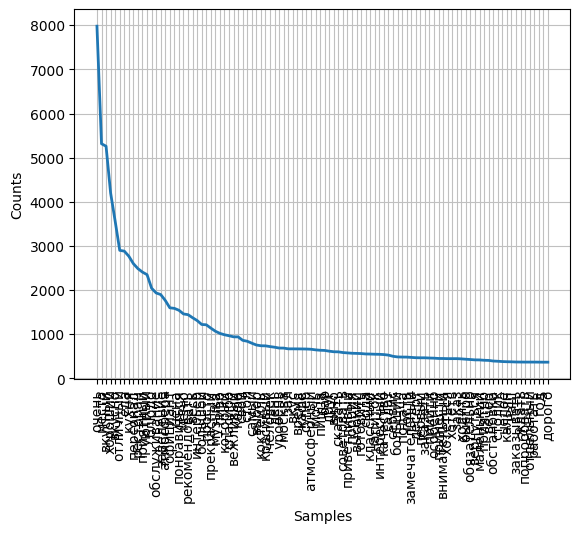

<Axes: xlabel='Samples', ylabel='Counts'>

In [68]:
fdist_sw = nltk.probability.FreqDist(final_texts)
print(fdist_sw.most_common(10))

fdist_sw.plot(100,cumulative=False)


In [62]:
import math

def get_prob(input):
    res = 1
    n = 0
    lst = input.split()
    for i in lst:
        ob = morph.parse(i)[0].normal_form
        if ob in fdist_sw:
            # print(fdist_sw[ob], len(final_texts))
            res *= fdist_sw[ob] / len(final_texts)
            n += 1
    return math.pow(res, 1/n)


print("обычный текст", get_prob("Средним геометрическим нескольких положительных вещественных чисел называется такое число, которым можно заменить каждое из этих чисел так, чтобы их произведение не изменилось. Более формально"))
print("фейк", get_prob("Приятное респектабельное место. Отличный приветливый и внимательный персонал. Удобное расположение на Савинской набережной с живописным видом."))
print("фейк", get_prob("Отличное место! Уютная атмосфера, дружелюбные сотрудники,хорошая еда и напитки, умеренные цены. Рекомендую! "))
print("обычный отзыв", get_prob("Атмосферное заведение. Азербайджанская кухня и культура. Разнообразное меню. Интересно. Как-будто побывала в Баку. "))
print("обычный отзыв", get_prob("Была с подругами на концерте. Очень красивый интерьер ресторана. Было много людей. Слушали любимого исполнителя, стоя прям у сцены!!! Небольшое помещение и это прекрасно) единственный минус, у бара официанты, кассир очень долго делали коктейли и принимали заказы. "))
print("шиза", get_prob("места очень"))

обычный текст 0.0002651786313272222
фейк 0.0003350003036195163
фейк 0.002547763427357003
обычный отзыв 0.0009231761096845799
обычный отзыв 0.0008860919353327162
шиза 0.023452584991457838


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_raw = " ".join(final_texts)
wordcloud = WordCloud().generate(text_raw)

plt.imshow(wordcloud, interpolation="bilinear")

plt.show()
